<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/PromptsTop2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

In [3]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset

# Load the dataset
prompts = load_dataset("DIBT/10k_prompts_ranked")

all_prompts = prompts['train']['prompt']






/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/10331 [00:00<?, ? examples/s]

In [5]:
!pip install top2vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.1 MB/s eta 0:00:00


In [6]:
from top2vec import Top2Vec

# Assuming 'documents' is a list of text documents you wish to model
model = Top2Vec(all_prompts, embedding_model='doc2vec', speed='fast-learn')





2024-03-21 23:12:17,906 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-21 23:12:20,950 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-21 23:13:56,019 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-21 23:14:39,253 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-21 23:14:39,705 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


# Save model so we don't have to redo Top2Vec learning

In [23]:
import pickle

# Save variable
with open(my_path+'prompt_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [24]:

# Load variable
with open(my_path+'prompt_model.pkl', 'rb') as f:
    model2 = pickle.load(f)

In [25]:
model2.get_num_topics()

48

In [ ]:
topics

In [ ]:
topics_words, word_scores, topic_nums = model.get_topics()


In [ ]:
topic_nums

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [ ]:
topics_words

array([['snippet', 'returns', 'task', ..., 'specifications', 'exists',
        'performs'],
       ['implications', 'potential', 'ethical', ..., 'industry',
        'efforts', 'support'],
       ['story', 'adventure', 'friends', ..., 'night', 'women', 'better'],
       ...,
       ['pair', 'agency', 'reasoning', ..., 'cooking', 'appear',
        'represented'],
       ['symbols', 'limit', 'mathematical', ..., 'five', 'individuals',
        'considering'],
       ['who', 'his', 'he', ..., 'person', 'makes', 'took']], dtype='<U15')

'finding'

In [ ]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["java"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=10)

# This will return the top 10 most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [ ]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:200]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 6946
Similarity Score: 0.47702398896217346
Document Content: Explain this Maven Spring Boot folder structure for folders and files that are not directly related to maven :
| .gitattributes
| .gitignore
| docker-compose.yml
| FOLDER\_STRUCTURE.md
| LICENSE.md
| ...
---
Document ID: 5363
Similarity Score: 0.442274808883667
Document Content: You have been assigned the task of writing a program that determines the number of classes in a Java project. Your program should analyze a given Java codebase and count the number of classes present....
---
Document ID: 2590
Similarity Score: 0.3730669617652893
Document Content: explain about ListView class in Java Wicket...
---
Document ID: 7531
Similarity Score: 0.3665294647216797
Document Content: how to take string input in java from scanner...
---
Document ID: 7986
Similarity Score: 0.3654463589191437
Document Content: write code Two Step Verification in java...
---
Document ID: 1055
Similarity Score: 0.35356536507606506
Document Co

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_sizes

array([658, 310, 178, 168, 140, 131, 126, 125, 121, 118, 114, 114, 113,
       109, 109, 109, 109, 108, 101, 101, 100, 100,  98,  97,  94,  92,
        91,  90,  87,  86,  85,  84,  84,  84,  84,  83,  83,  83,  83,
        81,  80,  79,  79,  77,  77,  76,  75,  75,  75,  75,  75,  74,
        74,  74,  74,  72,  72,  72,  72,  72,  72,  71,  71,  71,  70,
        70,  70,  69,  69,  69,  69,  68,  68,  68,  68,  66,  66,  66,
        66,  65,  65,  64,  64,  63,  63,  63,  63,  63,  62,  62,  62,
        61,  61,  60,  59,  59,  58,  58,  58,  57,  57,  57,  56,  56,
        55,  55,  55,  54,  52,  51,  51,  50,  50,  50,  49,  48,  46,
        45,  45,  43,  42,  41,  40,  35,  32,  32,  31,  26])

In [ ]:
sum(topic_sizes)

10331

In [ ]:
import umap.umap_ as umap
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(model.document_vectors)

# Get the document topics; returns a tuple where the first element is the document scores per topic,
# and the second element is the document's assigned topic. We're interested in the latter.
# Assuming you've already fit your Top2Vec model and have your umap_embeddings ready

# Get the document topics and other returned values if any
# This line is adjusted to capture all return values in a variable
document_topics_info = model.get_documents_topics(model.document_ids, reduced=False)

# Extracting the document_topics from the returned information
# Assuming document_topics are the second returned value, we index with [1]
# Adjust the indexing based on the actual structure of the returned values
document_topics = document_topics_info[1]

# Proceed with plotting as before
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=document_topics, cmap='viridis', s=5)
# plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1])
plt.colorbar()
plt.title('Document Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


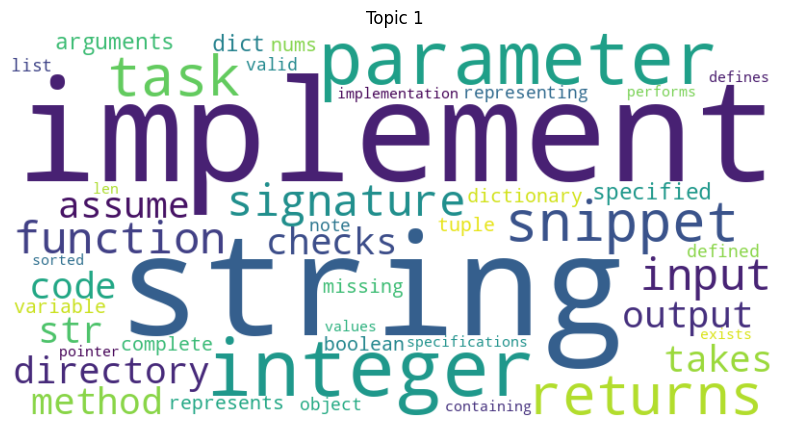

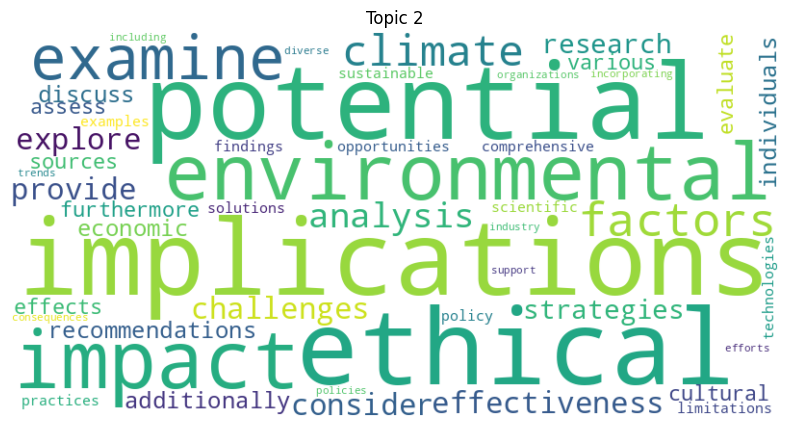

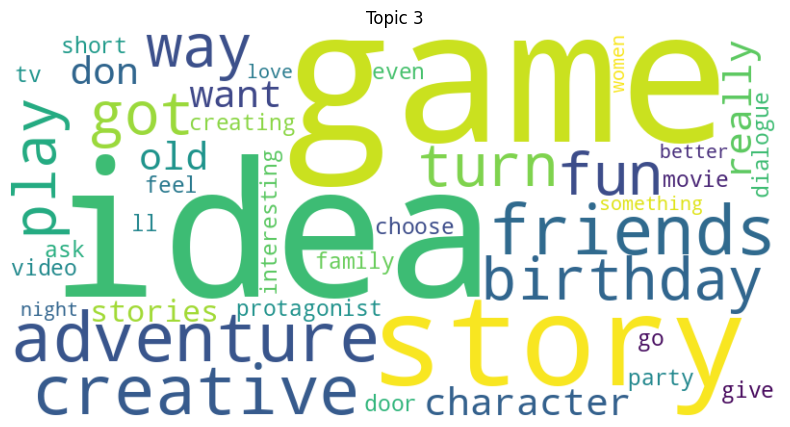

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num_clouds=3
##print just num_clouds graphs, not all

for i in range(num_clouds):  # Loop through the two topics
    # Generate a single string with all words for the topic
    topic_words_combined = ' '.join(topics_words[i])

    # Generate the word cloud for this topic
    wordcloud = WordCloud(width=800, height=400,  # You can adjust the size to your liking
                          background_color='white',
                          min_font_size=10).generate(topic_words_combined)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))  # Adjust figsize to your liking
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Topic {i+1}')
    plt.show()  # Show the current figure before moving on to the next
